<a href="https://colab.research.google.com/github/DanielAntu/predicao_preco_carro_usado_analise_treinamento/blob/main/analise_de_pre%C3%A7o_de_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download taeefnajib/used-car-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
used-car-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Arquivo {zip_path} extraído para {extract_to}")

# Exemplo de uso
zip_path = 'used-car-price-prediction-dataset.zip'
extract_to = '/content'
extract_zip(zip_path, extract_to)

Arquivo used-car-price-prediction-dataset.zip extraído para /content


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('used_cars.csv')
df.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"


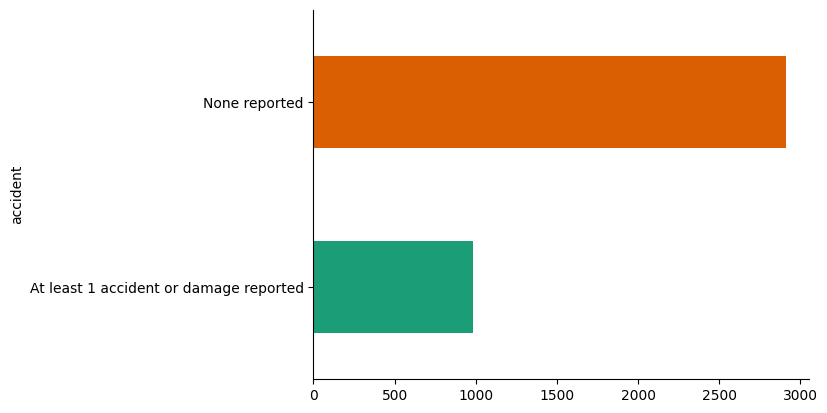

In [ ]:
# @title accident

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('accident').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

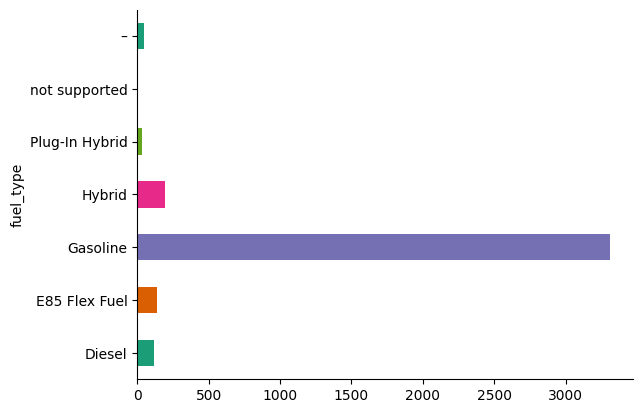

In [ ]:
# @title fuel_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('fuel_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

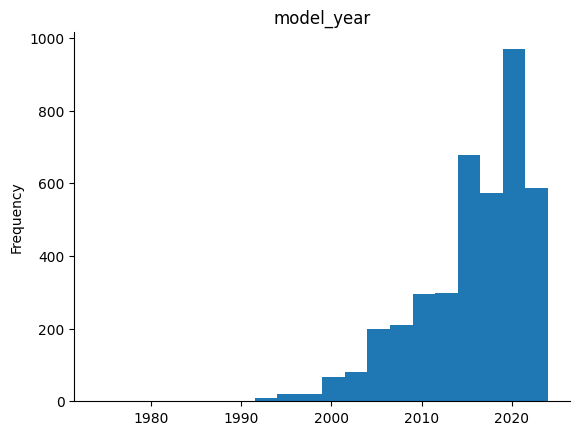

In [ ]:
# @title model_year

from matplotlib import pyplot as plt
df['model_year'].plot(kind='hist', bins=20, title='model_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [ ]:
df.isnull().sum() / df.shape[0]

,0
brand,0.000000
model,0.000000
model_year,0.000000
milage,0.000000
fuel_type,0.042405
engine,0.000000
transmission,0.000000
ext_col,0.000000
int_col,0.000000
accident,0.028187


In [ ]:
df.shape

(4009, 12)

In [ ]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
df.dropna(subset=['fuel_type', 'accident'], inplace=True)

In [ ]:
df['clean_title'].mode()[0]

'Yes'

In [ ]:
df['clean_title'].fillna(df['clean_title'].mode()[0], inplace=True)

<ipython-input-145-6e94aa4029f2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].fillna(df['clean_title'].mode()[0], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3730 non-null   object
 1   model         3730 non-null   object
 2   model_year    3730 non-null   int64 
 3   milage        3730 non-null   object
 4   fuel_type     3730 non-null   object
 5   engine        3730 non-null   object
 6   transmission  3730 non-null   object
 7   ext_col       3730 non-null   object
 8   int_col       3730 non-null   object
 9   accident      3730 non-null   object
 10  clean_title   3730 non-null   object
 11  price         3730 non-null   object
dtypes: int64(1), object(11)
memory usage: 378.8+ KB


In [ ]:
frequencia_modelos = df['brand'].value_counts()

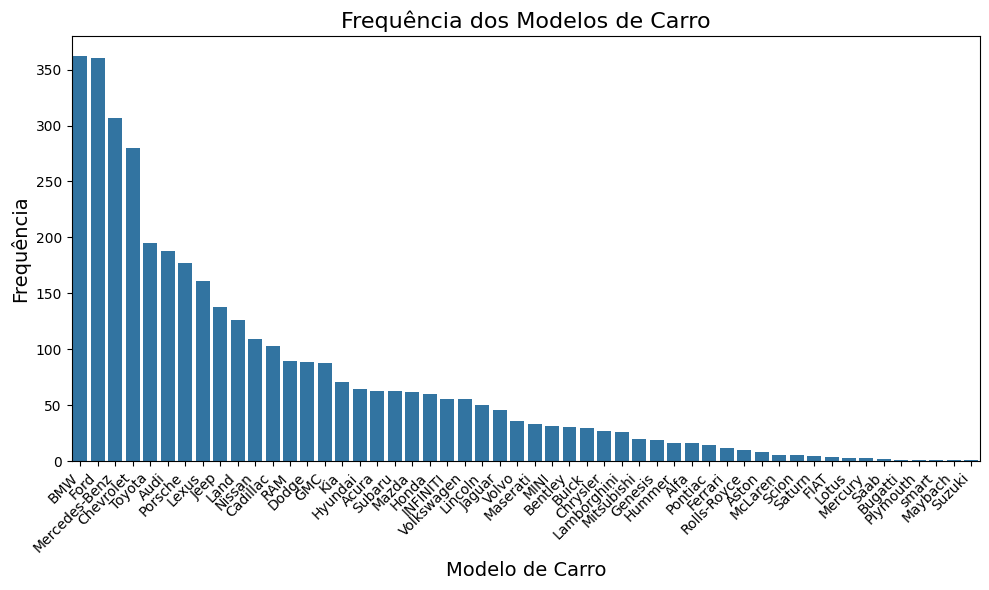

In [ ]:
plt.figure(figsize=(10,6))  # Define o tamanho do gráfico
sns.barplot(x=frequencia_modelos.index, y=frequencia_modelos.values)

# Adicionar títulos e rótulos
plt.title('Frequência dos Modelos de Carro', fontsize=16)
plt.xlabel('Modelo de Carro', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Rotacionar os rótulos do eixo X (caso os nomes dos modelos sejam grandes)
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
df.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0


In [ ]:
marca_com_menos_de_10 = frequencia_modelos[frequencia_modelos <= 10].index
df['brand'] = df['brand'].replace(marca_com_menos_de_10, 'outros')

In [ ]:
df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi.', '').astype(float)

In [ ]:
frequencia_combustiveis = df['fuel_type'].value_counts()

combustiveis_menor_200 = frequencia_combustiveis[frequencia_combustiveis < 200].index
df['fuel_type'] = df['fuel_type'].replace(combustiveis_menor_200, 'outros')

In [ ]:
frequencia_transmissao = df['transmission'].value_counts()

transmissao_menor_que_30 = frequencia_transmissao[frequencia_transmissao < 30].index
df['transmission'] = df['transmission'].replace(transmissao_menor_que_30, 'outros')

In [ ]:
frequencia_ext_col = df['ext_col'].value_counts() / df.shape[0] * 100

ext_col_menor_que_8 = frequencia_ext_col[frequencia_ext_col < 8].index
df['ext_col'] = df['ext_col'].replace(ext_col_menor_que_8, 'outros')

In [ ]:
frequencia_int_col = df['int_col'].value_counts() / df.shape[0] * 100

int_col_menor_que_12 = frequencia_int_col[frequencia_int_col < 12].index
df['int_col'] = df['int_col'].replace(int_col_menor_que_12, 'outros')

In [ ]:
df.drop(['engine', 'clean_title', 'model'], axis=1, inplace=True)

In [ ]:
df.head(3)

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price
0,Ford,2013,51000.0,outros,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300.0
1,Hyundai,2021,34742.0,Gasoline,8-Speed Automatic,outros,Gray,At least 1 accident or damage reported,38005.0
2,Lexus,2022,22372.0,Gasoline,Automatic,Blue,Black,None reported,54598.0


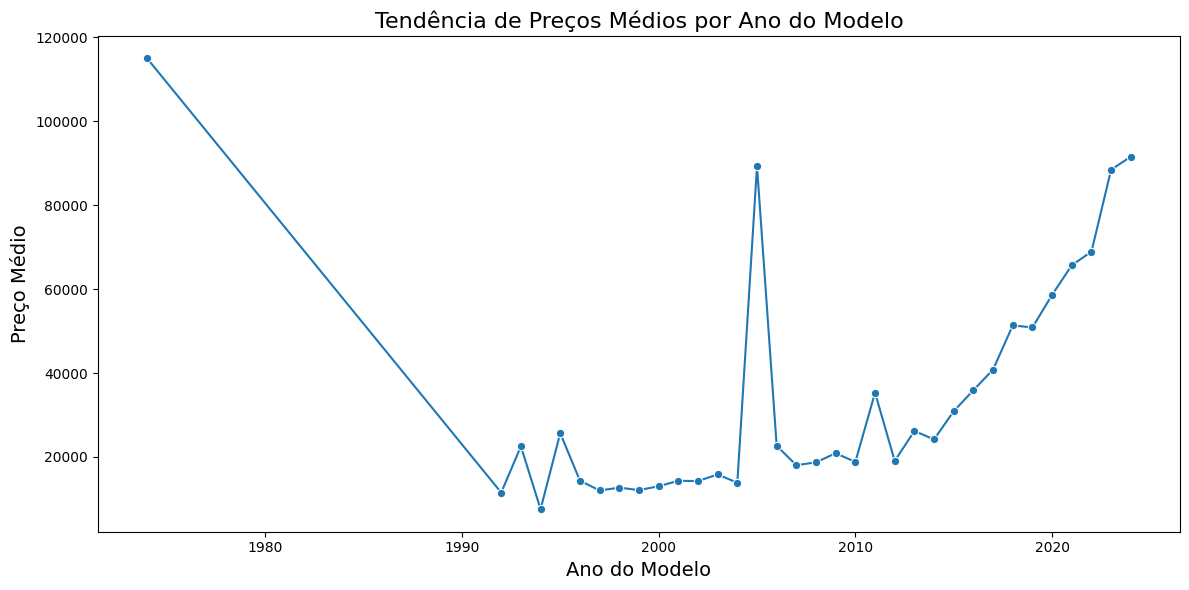

In [ ]:
media_precos_por_ano = df.groupby('model_year')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=media_precos_por_ano, x='model_year', y='price', marker='o')

# Adicionar títulos e rótulos
plt.title('Tendência de Preços Médios por Ano do Modelo', fontsize=16)
plt.xlabel('Ano do Modelo', fontsize=14)
plt.ylabel('Preço Médio', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

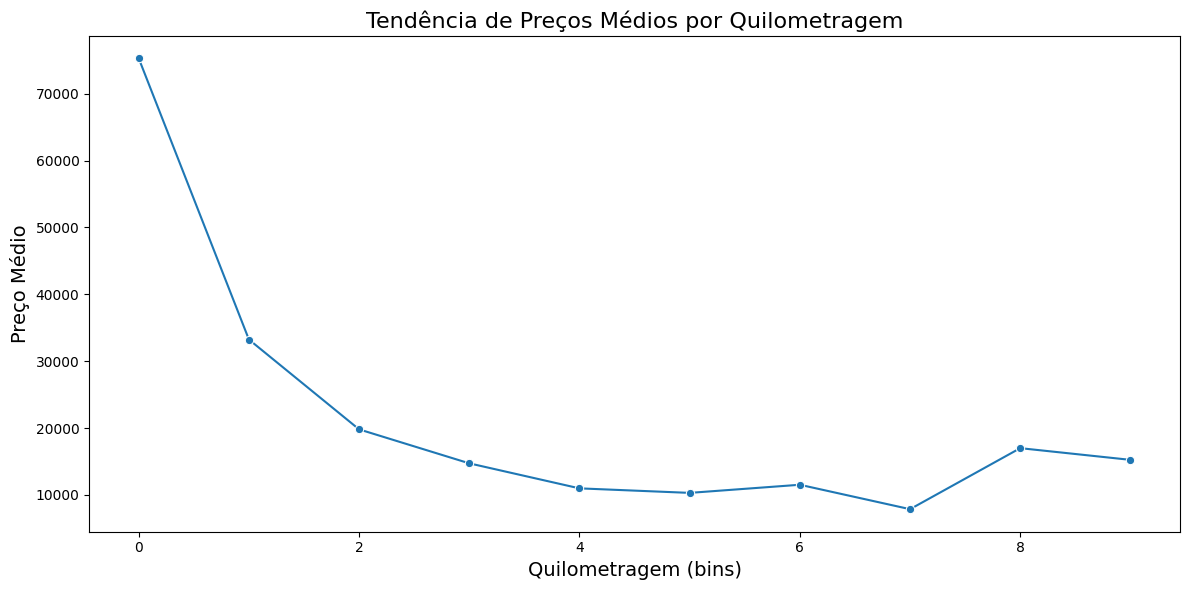

In [ ]:
df['mileage_bins'] = pd.cut(df['milage'], bins=10, labels=False)  # Criar bins para quilometragem
media_precos_por_mileage = df.groupby('mileage_bins')['price'].mean().reset_index()

# Criar um gráfico de linha para mostrar a média dos preços por quilometragem
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_precos_por_mileage, x='mileage_bins', y='price', marker='o')

# Adicionar títulos e rótulos
plt.title('Tendência de Preços Médios por Quilometragem', fontsize=16)
plt.xlabel('Quilometragem (bins)', fontsize=14)
plt.ylabel('Preço Médio', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

In [ ]:
df.drop('mileage_bins', axis=1, inplace=True)

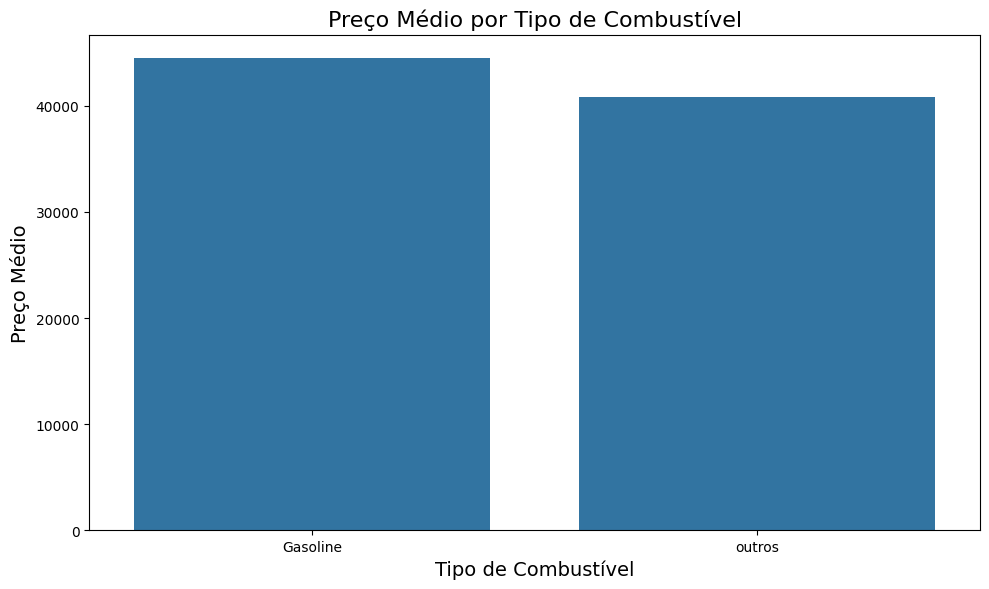

In [ ]:
media_precos = df.groupby('fuel_type')['price'].mean().reset_index()

# Criar um gráfico de barras para mostrar a média dos preços
plt.figure(figsize=(10, 6))
sns.barplot(data=media_precos, x='fuel_type', y='price')

# Adicionar títulos e rótulos
plt.title('Preço Médio por Tipo de Combustível', fontsize=16)
plt.xlabel('Tipo de Combustível', fontsize=14)
plt.ylabel('Preço Médio', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

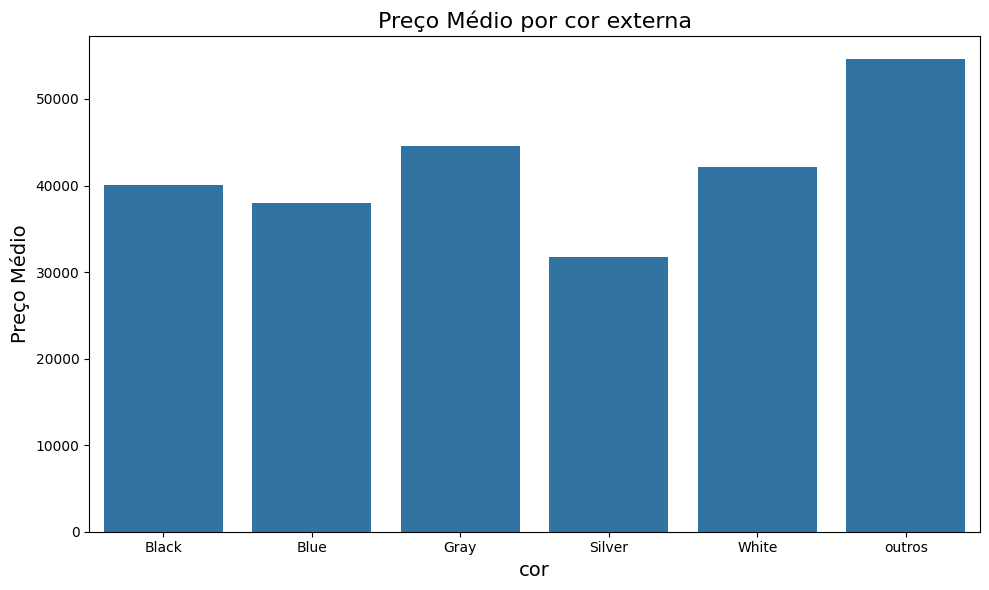

In [ ]:
media_precos = df.groupby('ext_col')['price'].mean().reset_index()

# Criar um gráfico de barras para mostrar a média dos preços
plt.figure(figsize=(10, 6))
sns.barplot(data=media_precos, x='ext_col', y='price')

# Adicionar títulos e rótulos
plt.title('Preço Médio por cor externa', fontsize=16)
plt.xlabel('cor', fontsize=14)
plt.ylabel('Preço Médio', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

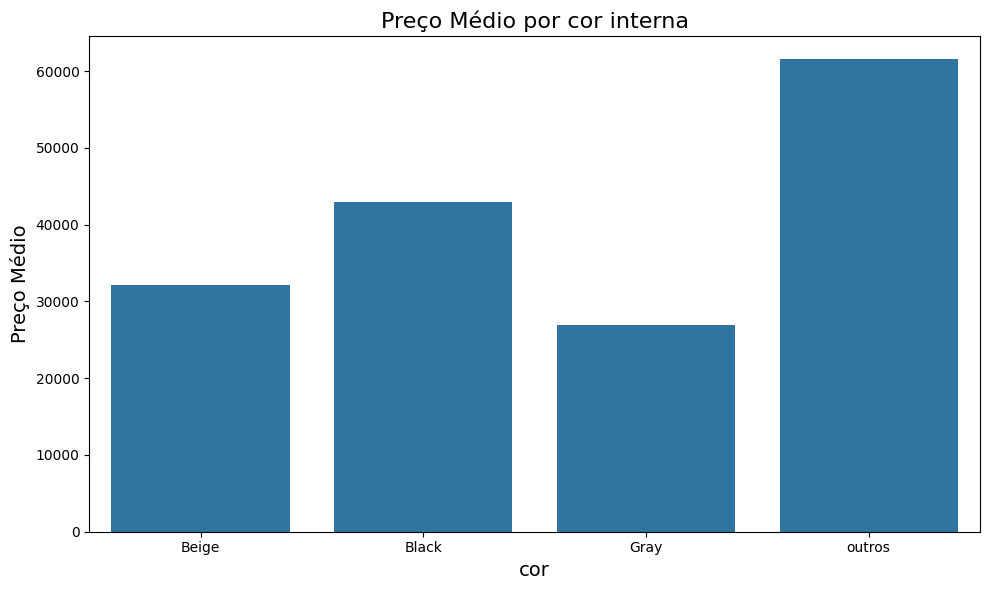

In [ ]:
media_precos = df.groupby('int_col')['price'].mean().reset_index()

# Criar um gráfico de barras para mostrar a média dos preços
plt.figure(figsize=(10, 6))
sns.barplot(data=media_precos, x='int_col', y='price')

# Adicionar títulos e rótulos
plt.title('Preço Médio por cor interna', fontsize=16)
plt.xlabel('cor', fontsize=14)
plt.ylabel('Preço Médio', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

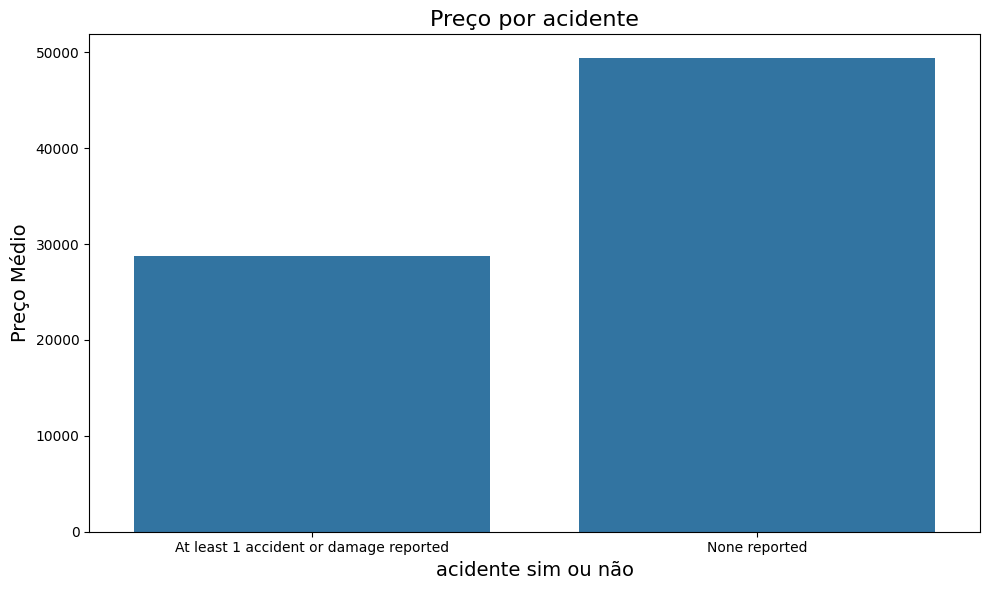

In [ ]:
media_precos = df.groupby('accident')['price'].mean().reset_index()

# Criar um gráfico de barras para mostrar a média dos preços
plt.figure(figsize=(10, 6))
sns.barplot(data=media_precos, x='accident', y='price')

# Adicionar títulos e rótulos
plt.title('Preço por acidente', fontsize=16)
plt.xlabel('acidente sim ou não', fontsize=14)
plt.ylabel('Preço Médio', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
df.head(2)

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,brand_num,fuel_type_num,transmission_num,ext_col_num,int_col_num,accident_num
0,Ford,2013,51000.0,outros,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300.0,11,1,5,0,1,0
1,Hyundai,2021,34742.0,Gasoline,8-Speed Automatic,outros,Gray,At least 1 accident or damage reported,38005.0,16,0,10,5,2,0


In [ ]:
df['brand_num'] = label_encoder.fit_transform(df['brand'])
df['fuel_type_num'] = label_encoder.fit_transform(df['fuel_type'])
df['transmission_num'] = label_encoder.fit_transform(df['transmission'])
df['ext_col_num'] = label_encoder.fit_transform(df['ext_col'])
df['int_col_num'] = label_encoder.fit_transform(df['int_col'])
df['accident_num'] = label_encoder.fit_transform(df['accident'])

In [ ]:
numeric_table = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
corr = numeric_table.corr()
corr

,model_year,milage,price,brand_num,fuel_type_num,transmission_num,ext_col_num,int_col_num,accident_num
model_year,1.000000,-0.613980,0.193587,-0.033000,0.019468,0.105571,0.056453,0.146363,0.186848
milage,-0.613980,1.000000,-0.301636,0.001338,0.057412,-0.096715,-0.100597,-0.150146,-0.291493
price,0.193587,-0.301636,1.000000,0.060292,-0.015314,0.099569,0.056813,0.097817,0.112077
brand_num,-0.033000,0.001338,0.060292,1.000000,-0.062587,0.038795,-0.006715,-0.064310,0.007621
fuel_type_num,0.019468,0.057412,-0.015314,-0.062587,1.000000,0.000064,0.009126,0.000384,-0.013735
transmission_num,0.105571,-0.096715,0.099569,0.038795,0.000064,1.000000,0.051778,0.036161,0.025192
ext_col_num,0.056453,-0.100597,0.056813,-0.006715,0.009126,0.051778,1.000000,0.110177,0.050102
int_col_num,0.146363,-0.150146,0.097817,-0.064310,0.000384,0.036161,0.110177,1.000000,0.035264
accident_num,0.186848,-0.291493,0.112077,0.007621,-0.013735,0.025192,0.050102,0.035264,1.000000


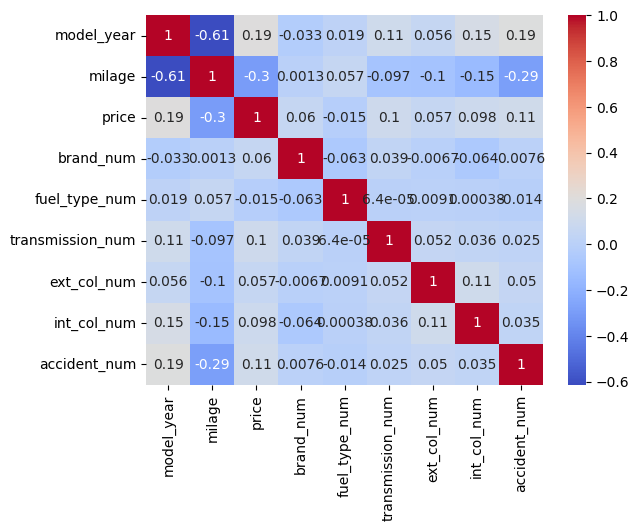

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.to_csv('df_final.csv', index=False)

- modelo de carro de 1980 para tráz acaba tendo um preço médio acima dos 10000 dolares e hoje são considerados reliquias
- modelo de 1990 até um pouca mais de 2000 se mantem com preço médio  2000 dolares devido a varios fatores
- modelos de 2010 para frente tende a ser mais caros devido a condições de carros e em 2020 teve mais um pico de 8000 dolares devido a pandemia
- Quanto maior a quilometragem menor preço
- Carros a gasolina são ligeiramente mais caros que com outros tipos de combustiveis
- parte externa do carro cinza, preto e branco aparece ligeiramente na frente e pode ter preço maiores
- Parte interna o preto predomina comparado ao preço
- Carros que nunca foram acidentado tende a ter preço maiores